### 1. Load Libraries 
* This is yolov5 - 7 version 

In [1]:
import os 
import sys 
from pathlib import Path
from  IPython.display  import display, Image, clear_output  # to display images

from yolov5 import train, val, detect
from roboflow import Roboflow
from dotenv import load_dotenv

load_dotenv()

/Users/adebayoakinlaluclearxp/.pyenv/versions/3.10.9/envs/object-detection-demo/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True

In [7]:
import os 
HOME = os.getcwd()
print(HOME)

/Users/adebayoakinlaluclearxp/object-classifier-tng/notebook-yolov5


### 2. Download the labeled images 
Ensure that you change local_env to .env and update the api_key

In [9]:
# Set your Roboflow API key
ROBOFLOW_API_KEY=os.getenv("API_KEY")

rf = Roboflow(api_key=ROBOFLOW_API_KEY)

#### 1.1 Create Path to store the dataset

In [11]:
!mkdir -p {HOME}/content/datasets 


In [ ]:
# Path(HOME + '/content/datasets').mkdir(exist_ok=True)

In [13]:
# set up environment
os.environ["DATASET_DIRECTORY"] = f"{HOME}/content/datasets"

#### 1.2 Download labeled images 

In [15]:
project = rf.workspace("adebayo-akinlalu-58jxx").project("fruit-model-uaxo9")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /Users/adebayoakinlaluclearxp/object-classifier-tng/notebook-yolov5/content/datasets/fruit-model-1 in yolov5pytorch:: 100%|██████████| 400/400 [00:00<00:00, 3558.69it/s]


### 3. Train Our Custom YOLOv5 model (CLI)

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 10000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [16]:
# %cd {HOME}

!yolov5 train --img 640 --batch 16 --epochs 50 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/Users/adebayoakinlaluclearxp/object-classifier-tng/notebook-yolov5/content/datasets/fruit-model-1/data.yaml, hyp=../../.pyenv/versions/3.10.9/envs/object-detection-demo/lib/python3.10/site-packages/yolov5/data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=True, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mmdet_tags=False, entity=None, bbox_interval=-1, artifact_alias=latest, neptune_token=None, neptune_project=None, s3_upload_dir=None, upload_dataset=False, hf_model_id=None, hf_token=None, hf_private=False, hf_dataset_id=None, img=640, batch=16
YOLOv5 🚀 2023-1-5 Python-3.10.9 torch-1.13.1 CPU

hype

In [ ]:
# train.run(data=f"{dataset.location}/data.yaml", weights="yolov5s.pt", imgsz=640)

### 4. Evaluate custom YOLOv5 detector performance (Tensorboard)

* Training losses and performance metrics are saved to Tensorboard.  

* The key metric to focus on is `mAP>=0.5`  

* Average precision computes the average precision value for recall value over 0 to 1.  

* In some context, we compute the AP for each class and average them

In [18]:
# Start tensorboard
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 54945), started 0:02:05 ago. (Use '!kill 54945' to kill it.)

In [ ]:
# val.run(data=f"{dataset.location}/data.yaml", weights="runs/train/exp/weights/best.pt", imgsz=640)

### 5. Run Inference  with trained Weight using CLI

In [19]:
!yolov5 detect --weights runs/train/exp/weights/best.pt --img 640 --conf_thres 0.25 --source {dataset.location}/test/images

YOLOv5 🚀 2023-1-5 Python-3.10.9 torch-1.13.1 CPU

Fusing layers... 
Model summary: 157 layers, 7061368 parameters, 0 gradients, 15.9 GFLOPs
image 1/8 /Users/adebayoakinlaluclearxp/object-classifier-tng/notebook-yolov5/content/datasets/fruit-model-1/test/images/10-pineapple-png-image-download-thumb-1-_png.rf.1c17ee406a593b431701a1cf347840a9.jpg: 640x640 1 pineapple, 112.0ms
image 2/8 /Users/adebayoakinlaluclearxp/object-classifier-tng/notebook-yolov5/content/datasets/fruit-model-1/test/images/17-red-cherry-png-image-download-thumb_png.rf.8972b6ab0ba9664bcc142a05f34a5fc6.jpg: 640x640 (no detections), 112.7ms
image 3/8 /Users/adebayoakinlaluclearxp/object-classifier-tng/notebook-yolov5/content/datasets/fruit-model-1/test/images/19-orange-png-image-download-thumb_png.rf.d49a4da0e2b8eb1f08327e8cff465ae6.jpg: 640x640 1 orange, 101.7ms
image 4/8 /Users/adebayoakinlaluclearxp/object-classifier-tng/notebook-yolov5/content/datasets/fruit-model-1/test/images/2-2-apricot-free-download-png-thumb_pn

In [ ]:
# detect.run(weights="runs/train/exp/weights/best.pt", imgsz=640, conf_thres=0.25, source=f"{dataset.location}/test/images")

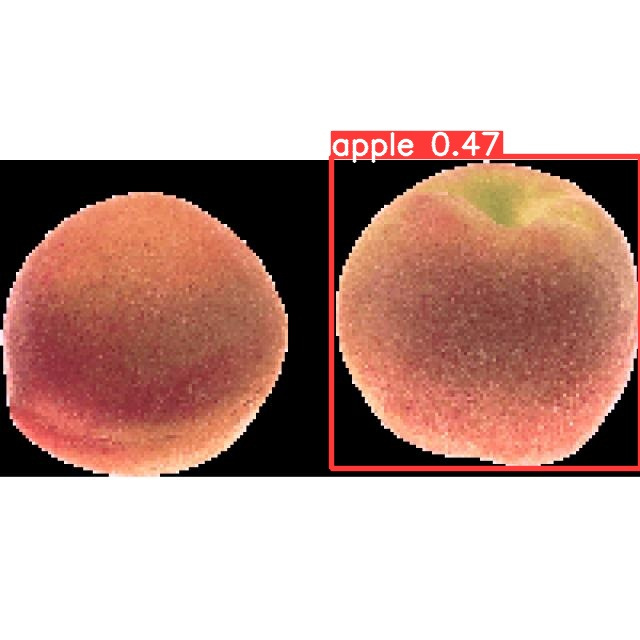

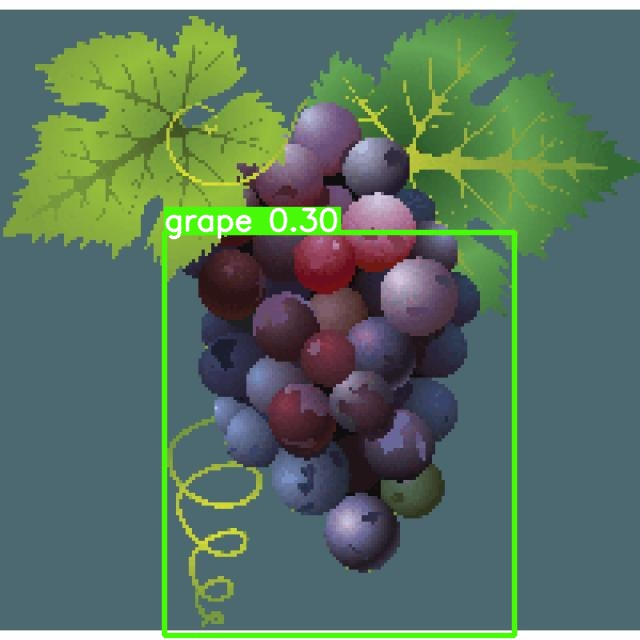

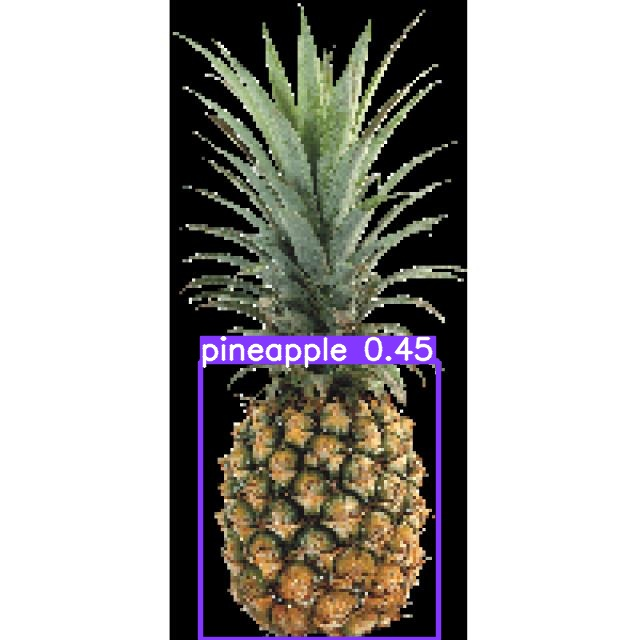

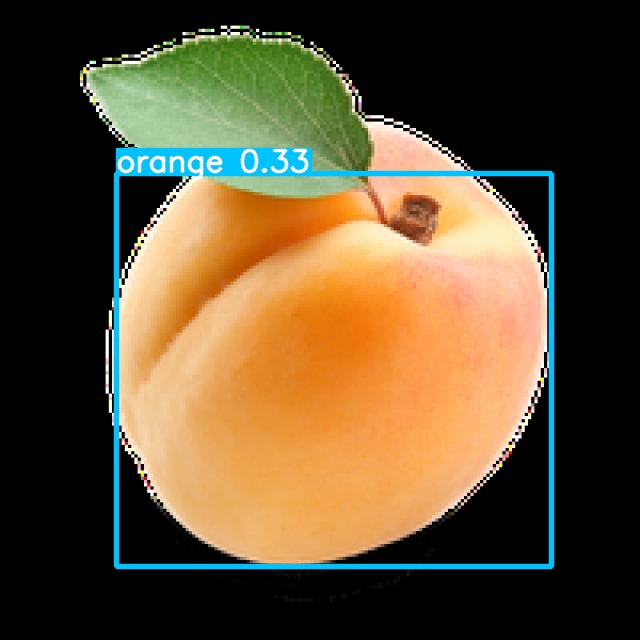

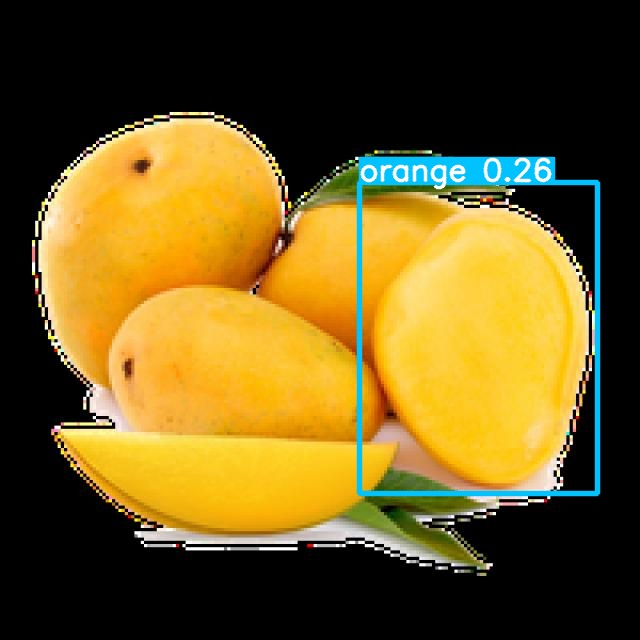

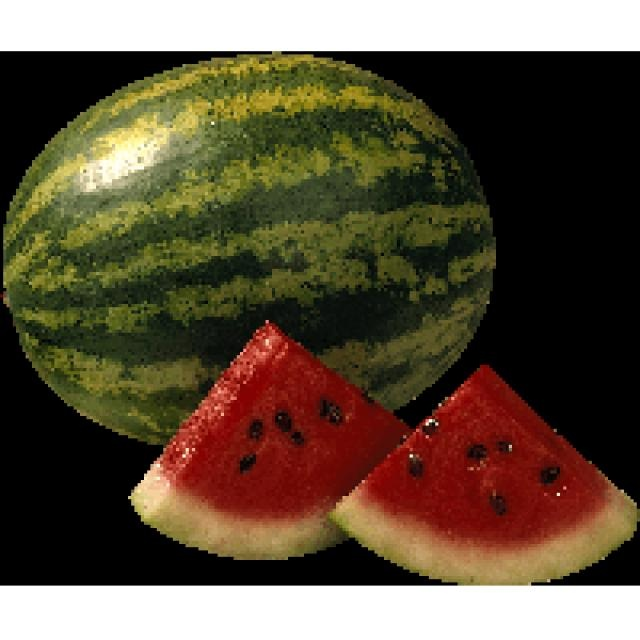

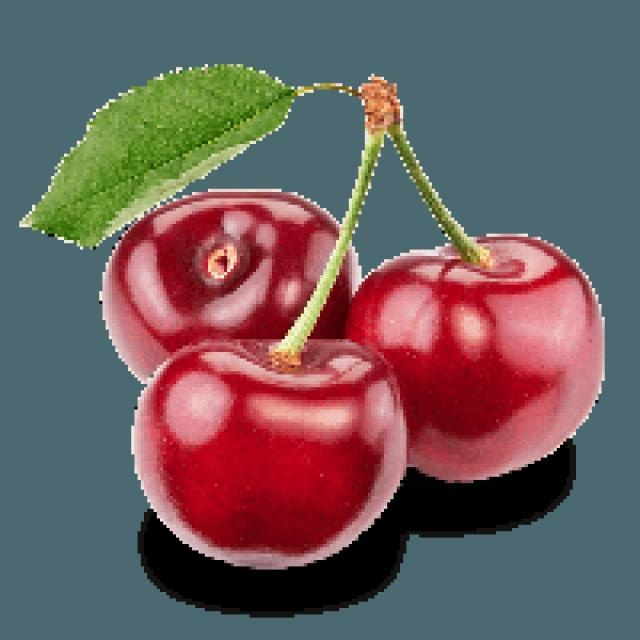

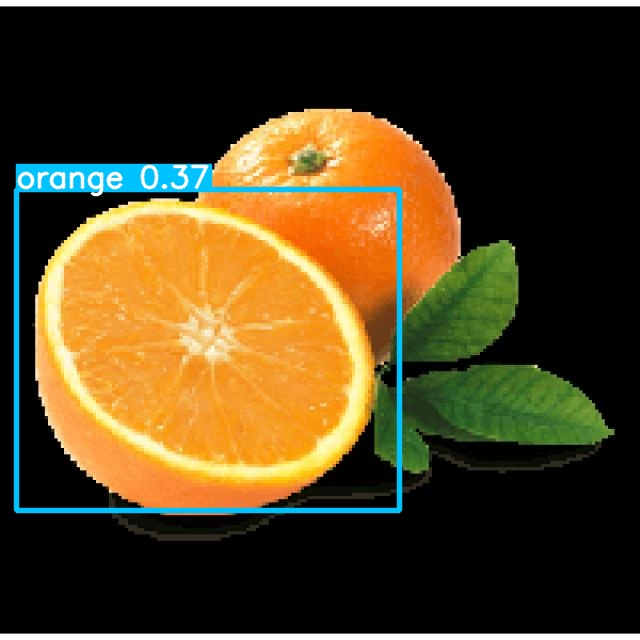

In [20]:
import glob
from IPython.display import Image, display

for imageName in glob.glob(f'runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

### 6. Export the Weights into Tensorflowjs or ONNX


In [ ]:
// torchscript,onnx,coreml,pb,tfjs

In [21]:
!yolov5 export --weights runs/train/exp/weights/best.pt --include onnx,tfjs

YOLOv5 🚀 2023-1-5 Python-3.10.9 torch-1.13.1 CPU

Fusing layers... 
Model summary: 157 layers, 7061368 parameters, 0 gradients, 15.9 GFLOPs

PyTorch: starting from runs/train/exp/weights/best.pt with output shape (1, 25200, 24) (13.9 MB)

ONNX: starting export with onnx 1.13.0...
ONNX: export success ✅ 0.6s, saved as runs/train/exp/weights/best.onnx (27.4 MB)

TensorFlow SavedModel: starting export with tensorflow 2.11.0...

                 from  n    params  module                                  arguments                     
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

  0                -1  1      3520  yolov5.models.common.Conv               [3, 32, 6, 2, 2]              
  1                -1  1     18560  yolov5.models.common.Conv               [32, 64, 3, 2]                
  2                -1  1     18816  yolov5.models.common.C3                 [64, 64, 1]                   
  3                -1  1     73984  yolov5.models.common.Conv     

In [ ]:
# export.run(weights="runs/train/exp/weights/best.pt", include="torchscript,onnx,coreml,pb,tfjs")   

### 7. Convert pb into json format for Javascript API 
* To run the weight in the browsers, we need to convert the model to json if we are using tensorflowjs [tensorflowjs](!https://www.tensorflow.org/js)
and to onnx if we are using onnxruntime [onnxruntime](!https://onnxruntime.ai/docs/get-started/with-javascript.html).    

* There are other two Javascript APIs can be leveraged: [yolov5js](!https://github.com/SkalskiP/yolov5js) and [ml5js](!https://learn.ml5js.org/#/). Yolov5js and ml5js are wrapped around tensorflowjs. 


###

### 8. Using Yolov5 Python APi

In [2]:
import yolov5

# set model params 
model_path = 'runs/train/exp/weights/best.pt'
device = 'cpu' # cuda:0

/Users/adebayoakinlaluclearxp/.pyenv/versions/3.10.9/envs/object-detection-demo/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### 1. Load the model

In [5]:
model = yolov5.load(model_path, device=device)

#### 2. Predict on set of images 

In [21]:
filepath = "content/datasets/fruit-model-1/test/images"
bag_of_images = [ f"{filepath}/{filename}" for filename in os.listdir(f'content/datasets/fruit-model-1/test/images')]
print(bag_of_images)

['content/datasets/fruit-model-1/test/images/41-peach-png-image-thumb_png.rf.65d209c096165011842720797a859cea.jpg', 'content/datasets/fruit-model-1/test/images/7-grape-png-image-thumb_png.rf.8603c82f4470aabbd396dfda0a75641e.jpg', 'content/datasets/fruit-model-1/test/images/10-pineapple-png-image-download-thumb-1-_png.rf.1c17ee406a593b431701a1cf347840a9.jpg', 'content/datasets/fruit-model-1/test/images/2-2-apricot-free-download-png-thumb_png.rf.fa4bba22c215b0647ee69eaf637ee5d3.jpg', 'content/datasets/fruit-model-1/test/images/9-2-mango-transparent-thumb_png.rf.d3a62e77bc865f58008e0490cb362aef.jpg', 'content/datasets/fruit-model-1/test/images/3-watermelon-png-image-thumb_png.rf.45d38fd02eeb68e357a07e6abc744ad8.jpg', 'content/datasets/fruit-model-1/test/images/17-red-cherry-png-image-download-thumb_png.rf.8972b6ab0ba9664bcc142a05f34a5fc6.jpg', 'content/datasets/fruit-model-1/test/images/19-orange-png-image-download-thumb_png.rf.d49a4da0e2b8eb1f08327e8cff465ae6.jpg']


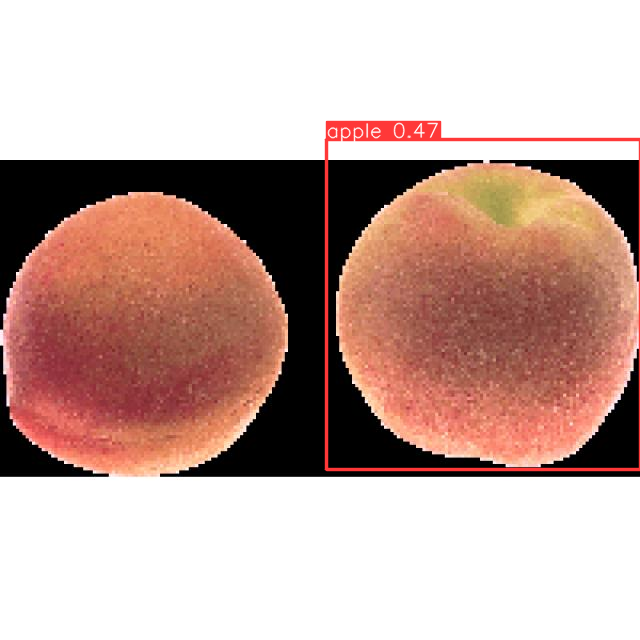

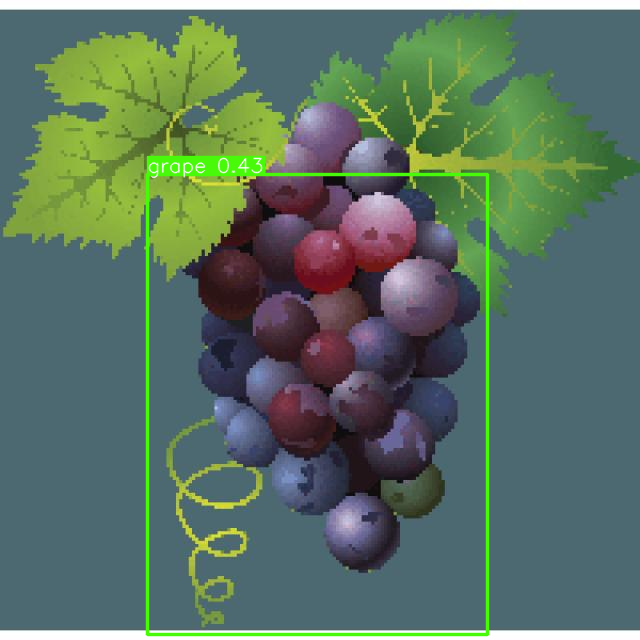

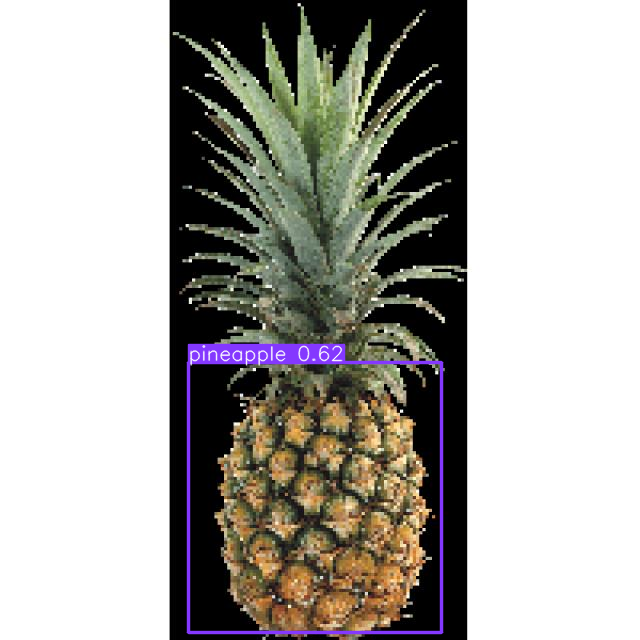

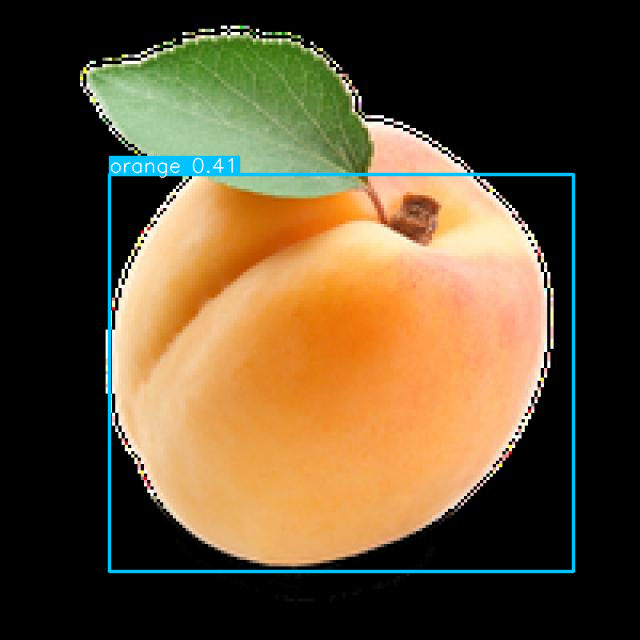

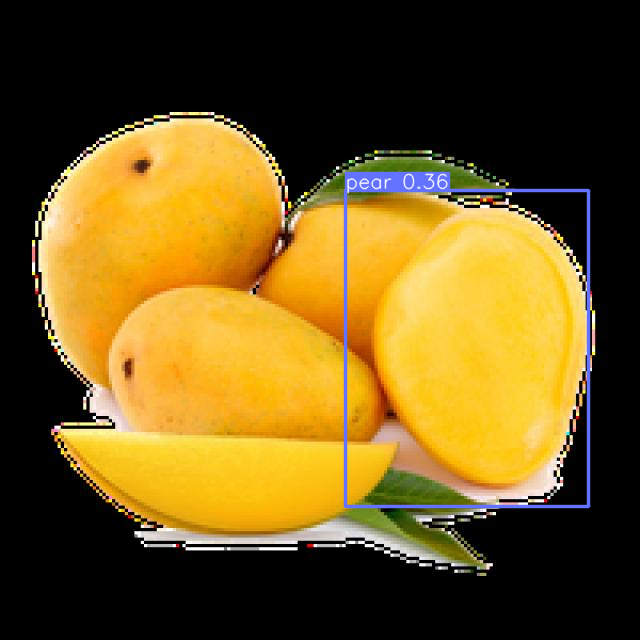

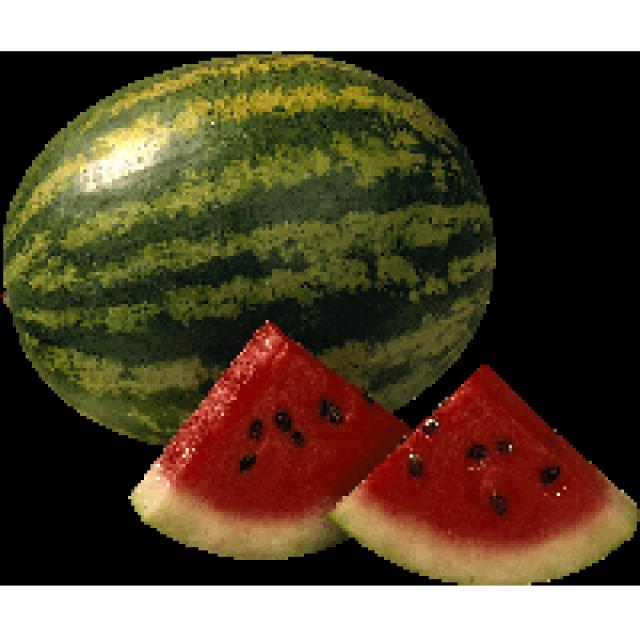

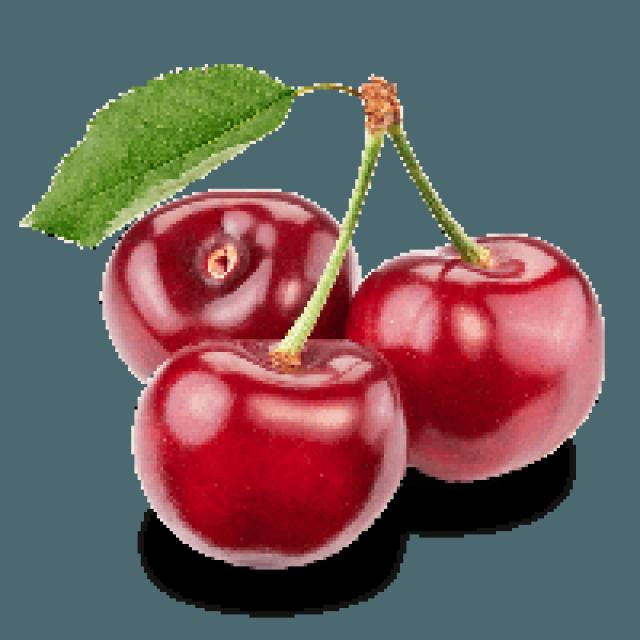

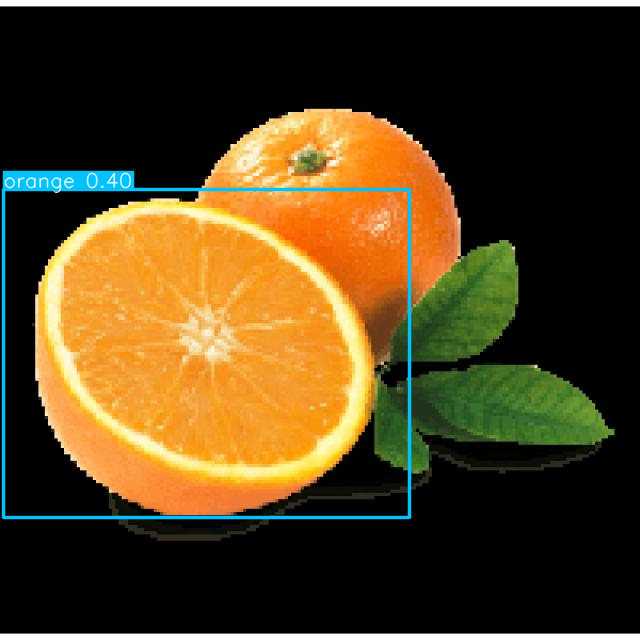

In [23]:
results = model(bag_of_images, augment=True)
results.show()

#### 4. Identify the class name

In [27]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,326.635223,139.457977,640.0,469.465363,0.467845,0,apple
